### **Proyecto Final - Borda y Pagano**

**Introduccion e Hipotesis**

El siguiente trabajo tiene como objetivo analizar las caracteriticas de las ventas de videojuegos en los tres mayores mercados del mundo (Estados Unidos, Europa y Japon). Cada mercado tiene caracteristicas unicas por lo que es fundamental tener claro como es cada uno al momento de desarrollar videojuegos. Si tenemos claro a que publico apuntamos podemos saber como tiene que ser lo que desarrollemos. 
Para este trabajo hemos utilzado un DataSet publico de Kaggle. La informacion esta divida por mercados, genero de videojuego y año de venta.
Tenemos la creencia de que cada mercado es unico en sus caracteristicas y no se parecen uno al otro, por lo que si queremos ser lideres en ventas tenemos que tener claro a quien le queremos vender.
Todas estos analisis los iremos realizando y comentando a lo largo del trabajo para darle una vision amplia de los mercados y los videojuegos. 
Despues de dar un rapido vistaso a los graficos es evidente como los mercados Europeos y Estadounidense son similiares en cuanto a sus gustos aunque muy diferentes al mercado Japones. Si uno quiere triunfar en Estados Unidos o Europa es probable que deba desarrollar videojuegos para PlayStation o Xbox; en cambio, si quiere triunar en Japon deberiamos desarrollar videojuegos para Nintendo. Por otro lado si deseamos desarrollar videojuegos para los dos primeros debemos orientarnos hacia los shooters, pero en el pais oriental deberiamos apuntar a los RPG.
Por otro lado, podemos ver caracteristicas similares entre los mercados, por ejemplo la clasificacion mas vendida en los tres mercados es 'E' (Para todo publico).

Por esta razon, nos surgen las siguientes preguntas: ¿Por que razon existen  diferencias tan marcadas en los gustos de los consumidores de videojuegas occidentales y orientales? ¿Como influyen los juegos de determinadas plataformas en las ventas? ¿Que region genera mas ganancias para las grandes empresas de videojuegos? ¿Cual desarrollador es mas dominante en relacion de cantidad de lanzamientos y ventas conseguidas? 

**Definicion de Objetivo**

Por medio de este trabajo, nuestro objetivo es definir que tipo de videojuego y en que consola puede llegar a tener mayor exito tanto en el mercado oriental como el occidental.


**Contexto Comercial**

Las empresas desarrolladoras de videojuegos estan cansadas de crear juegos que no sean rentables en algunos de los mayores mercados del mundo, ya sea el mercado japones, estadounidense o europeo. Las diferencias culturales entre los orientales y occidentales afectan tambien a desarrollar un distinto perfil de gamer. Por esto, las empresas de videojuegos nos contrataron para que podamos encontrar que tipo y estilo de juego pueda encajar en la mayor cantidad de perfiles que existen. De esta manera, se aseguraran en un gran porcentaje el exito del nuevo juego.

**Problema Comercial**

Nos hacemos las siguientes preguntas:



*   ¿Que genero de juego tiene mayor aceptacion en los tres mercados?

*   ¿Cuales son esos juegos? ¿Cual es su trama?


*   ¿Que consola tiene mayor aceptacion en los tres mercados?
*   ¿Cual es esta consola? ¿Que la diferencia con las otras?

*   ¿Que juego tiene mayor valoracion por los criticos? ¿Y por los usuarios?
*   ¿Los juegos que tienen mayor valoracion fueron de los mas vendidos en alguno de los mercados?

*   ¿El exito de los juegos en sus ventas globales coincide con el exito en alguno de los tres principales mercados?









**Contexto Analitico**

Junto a este notebook encontraran el archivo "Video_Game_Sales.csv" que contiene los detalles de cada juego. Entre sus columnas, encontraran: 'Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating', 'Global_Sales'. 

El delimitador en el archivo .CSV brindado es “,”.

In [ ]:
#Montamos el drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importamos las librerias necesarias
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling

df = pd.read_csv('/content/drive/MyDrive/Data Science/Obtencion de Insigths/Video_Games_Sales.csv')

**0. ANALISIS DE LA BASE DE DATOS**

Como punto de partida para este estudio hemos tomado una base de datos publica que contiene las ventas por region, genero y plataforma de mas de catorce mil videojuegos. Estos datos van aproximadamente desde 1980 hasta 2020.
Podemos afirmar que tenemos una muestra lo suficientemente extensa como para corroborar o descartar las hipotesis que nos estamos planteando.

**0.1 EDA - EXPLORATORY DATA ANALYSIS**

Haremos un EDA (analisis exploratorio de datos) a fin de entender que los datos que utilizaremos sean correctos, a fin de prevenir falsos resultados.

In [ ]:
#podemos ver los tipos de datos y caracteristicas de las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14576 entries, 0 to 14575
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             14574 non-null  object 
 1   Platform         14576 non-null  object 
 2   Year_of_Release  14344 non-null  float64
 3   Genre            14574 non-null  object 
 4   Publisher        14527 non-null  object 
 5   NA_Sales         14576 non-null  float64
 6   EU_Sales         14576 non-null  float64
 7   JP_Sales         14576 non-null  float64
 8   Critic_Score     7217 non-null   float64
 9   Critic_Count     7217 non-null   float64
 10  User_Score       8760 non-null   object 
 11  User_Count       6796 non-null   float64
 12  Developer        8829 non-null   object 
 13  Rating           8704 non-null   object 
 14  Global_Sales     14576 non-null  float64
dtypes: float64(8), object(7)
memory usage: 1.7+ MB


In [ ]:
#Vemos la vision general de los datos para una primera impresion
df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,Nintendo,E,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,NaN,NaN,NaN,NaN,NaN,NaN,31.37


In [ ]:
#Podemos ver los nombres de las columnas de nuestra database y el tamaño de la misma
print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)

Cantidad de Filas y columnas: (14576, 15)
Nombre columnas: Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count', 'Developer', 'Rating', 'Global_Sales'],
      dtype='object')


In [ ]:
#Analizamos los valores nulos
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     232
Genre                 2
Publisher            49
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       7359
Critic_Count       7359
User_Score         5816
User_Count         7780
Developer          5747
Rating             5872
Global_Sales          0
dtype: int64

In [ ]:
#Analizamos los datos numericos y sus datos estadisticos 
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Count,Global_Sales
count,14344.000000,14576.000000,14576.000000,14576.000000,7217.000000,7217.000000,6796.000000,14576.000000
mean,2006.437117,0.295577,0.163957,0.085659,69.676043,27.312041,172.513096,0.598972
std,5.955664,0.866491,0.536354,0.329646,13.773391,19.464196,576.609716,1.647699
min,1980.000000,0.000000,0.000000,0.000000,13.000000,3.000000,4.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,61.000000,12.000000,11.000000,0.050000
50%,2007.000000,0.100000,0.030000,0.000000,71.000000,22.000000,27.000000,0.220000
75%,2010.000000,0.280000,0.130000,0.030000,80.000000,38.000000,89.000000,0.550000
max,2020.000000,41.360000,28.960000,10.220000,98.000000,113.000000,10665.000000,82.530000


Nos llama la atencion la gran diferencia entre el valor del 75% y el maximo de NA_Sales, EU_Sales y JP_Sales. Mas adelante realizaremos un analisis de posibles outliers. Lo mismo ocurre con User_Count

In [ ]:
#Analizamos la correlacion entre los datos
import statsmodels.api as sm
corr = df.set_index('Global_Sales').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

Vemos que no existen variables con altas coorelaciones.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


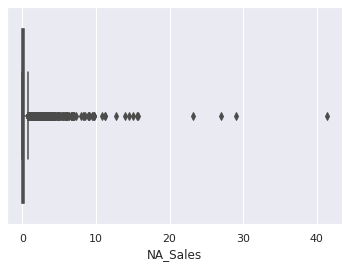

In [ ]:
#Analizamos posibles outliers en NA_Sales
plt.figure(figsize=(6,4))
sns.boxplot(df['NA_Sales'])
plt.show()

In [ ]:
#Filtramos los posibles outliers de NA_Sales
outliers_NA_Sales = df[df.NA_Sales > 20]
outliers_NA_Sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,Nintendo,E,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,NaN,NaN,NaN,NaN,NaN,NaN,40.24
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,NaN,NaN,NaN,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,NaN,NaN,NaN,NaN,NaN,NaN,28.31


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


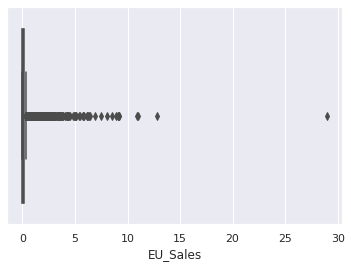

In [ ]:
#Analizamos posibles outliers en EU_Sales
plt.figure(figsize=(6,4))
sns.boxplot(df['EU_Sales'])
plt.show()

In [ ]:
#Filtramos los posibles outliers de EU_Sales
outliers_EU_Sales = df[df.EU_Sales > 25]
outliers_EU_Sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,Nintendo,E,82.53


In [ ]:
#Filtramos los posibles outliers de JP_Sales
outliers_JP_Sales = df[df.JP_Sales > 10]
outliers_JP_Sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,NaN,NaN,NaN,NaN,NaN,NaN,31.37


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


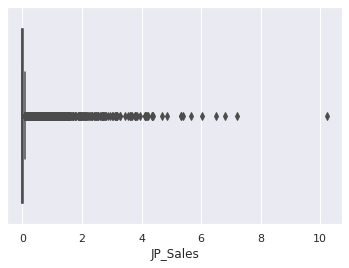

In [ ]:
#Analizamos posibles outliers en JP_Sales
plt.figure(figsize=(6,4))
sns.boxplot(df['JP_Sales'])
plt.show()

Segun nuestro analisis de outliers podemos estimar que no se trate de desvios en la informacion sino que se trata juegos historicos con ventas record como tratarse de Mario Bros, Pokemon Red o Tetris.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


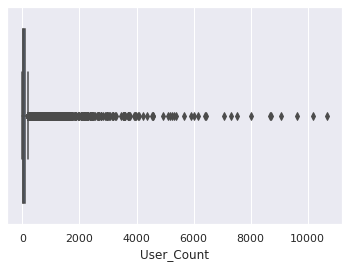

In [ ]:
#Analizamos posibles outliers en User_Count
plt.figure(figsize=(6,4))
sns.boxplot(df['User_Count'])
plt.show()

In [ ]:
#Filtramos los posibles outliers de User_Count
outliers_User_Count = df[df.User_Count > 8000]
outliers_User_Count.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.04,4.24,0.13,88.0,81.0,3.4,8713.0,"Infinity Ward, Sledgehammer Games",M,14.73
149,The Last of Us,PS3,2013.0,Action,Sony Computer Entertainment Europe,2.41,2.18,0.28,95.0,98.0,9.1,8003.0,Naughty Dog,M,5.87
192,Diablo III,PC,2012.0,Role-Playing,Activision,2.44,2.16,0.00,88.0,86.0,4,9629.0,Blizzard Entertainment,M,5.14
303,The Witcher 3: Wild Hunt,PS4,2015.0,Role-Playing,Namco Bandai Games,1.02,2.13,0.23,92.0,79.0,9.2,10179.0,CD Projekt Red Studio,M,3.97
313,The Elder Scrolls V: Skyrim,PC,2011.0,Role-Playing,Bethesda Softworks,1.16,2.12,0.00,94.0,32.0,8.1,9073.0,Bethesda Game Studios,M,3.88


En este caso podemos ver que los juegos que se encuentran entre los tops de usuarios son juegos de record de ventas por lo que consideramos que no es necesario normalizar estos datos

A continuacion vamos a realizar una normalizacion de los datos para tener los datos listos en casos de querer analizar los mismos sin estos desvios vistos anterioremente.

In [ ]:
df['User_Score'] = pd.to_numeric(df['User_Score'],errors = 'coerce')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder


enc = OrdinalEncoder()
enc.fit(df[["Name"]])
df[["Name_code"]] = enc.transform(df[["Name"]])


In [ ]:
dummy_columns = {
    'Platform': {
        'prefix': 'PLAT',
        'sep': ';'
    }
 }

for column_name, dummy_data in dummy_columns.items():
	# Recogemos un DataFrame con una columna dummy por cada valor
    dummies = df[column_name].str.get_dummies(sep=dummy_data['sep'])

    # Añadimos `prefix` a cada columna
    dummies.columns = map(lambda col: f'{dummy_data["prefix"]}_{col}', dummies.columns)
    
    # Añadimos las columnas dummy al df original
    df = pd.concat([df, dummies], axis=1)

In [ ]:
dummy_columns = {
'Genre': {
        'prefix': 'Genre',
        'sep': ';'
    }
 }

for column_name, dummy_data in dummy_columns.items():
	# Recogemos un DataFrame con una columna dummy por cada valor
    dummies = df[column_name].str.get_dummies(sep=dummy_data['sep'])

    # Añadimos `prefix` a cada columna
    dummies.columns = map(lambda col: f'{dummy_data["prefix"]}_{col}', dummies.columns)
    
    # Añadimos las columnas dummy al df original
    df = pd.concat([df, dummies], axis=1)

In [ ]:
dummy_columns = {
  'Publisher': {
        'prefix': 'Publisher',
        'sep': ';'
    }
 }

for column_name, dummy_data in dummy_columns.items():
	# Recogemos un DataFrame con una columna dummy por cada valor
    dummies = df[column_name].str.get_dummies(sep=dummy_data['sep'])

    # Añadimos `prefix` a cada columna
    dummies.columns = map(lambda col: f'{dummy_data["prefix"]}_{col}', dummies.columns)
    
    # Añadimos las columnas dummy al df original
    df = pd.concat([df, dummies], axis=1)

In [ ]:
dummy_columns = {
    'Developer': {
        'prefix': 'Developer',
        'sep': ';'
    }
 }

for column_name, dummy_data in dummy_columns.items():
	# Recogemos un DataFrame con una columna dummy por cada valor
    dummies = df[column_name].str.get_dummies(sep=dummy_data['sep'])

    # Añadimos `prefix` a cada columna
    dummies.columns = map(lambda col: f'{dummy_data["prefix"]}_{col}', dummies.columns)
    
    # Añadimos las columnas dummy al df original
    df = pd.concat([df, dummies], axis=1)

In [ ]:
dummy_columns = {
    'Rating': {
        'prefix': 'Rating',
        'sep': ';'
    }
 }

for column_name, dummy_data in dummy_columns.items():
	# Recogemos un DataFrame con una columna dummy por cada valor
    dummies = df[column_name].str.get_dummies(sep=dummy_data['sep'])

    # Añadimos `prefix` a cada columna
    dummies.columns = map(lambda col: f'{dummy_data["prefix"]}_{col}', dummies.columns)
    
    # Añadimos las columnas dummy al df original
    df = pd.concat([df, dummies], axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
transformed_df = scaler.fit_transform(df.iloc[:, 5:12])
transformed_df = pd.DataFrame(transformed_df)
df["NA_Sales_Tranformed"] = transformed_df[0]
df["EU_Sales_Tranformed"] = transformed_df[1]
df["JP_Sales_Tranformed"] = transformed_df[2]
df["Critic_Score_Tranformed"] = transformed_df[3]
df["Critic_Count_Tranformed"] = transformed_df[4]
df["User_Score_Tranformed"] = transformed_df[5]
df["User_Count_Tranformed"] = transformed_df[6]


transformed_df = scaler.fit_transform(df.iloc[:, 14:])
transformed_df = pd.DataFrame(transformed_df)
df["Global_Sales_Tranformed"] = transformed_df[0]

df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,...,Rating_RP,Rating_T,NA_Sales_Tranformed,EU_Sales_Tranformed,JP_Sales_Tranformed,Critic_Score_Tranformed,Critic_Count_Tranformed,User_Score_Tranformed,User_Count_Tranformed,Global_Sales_Tranformed
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,...,0,0,1.000000,1.000000,0.368885,0.741176,0.436364,0.824742,0.029828,1.000000
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,NaN,NaN,...,0,0,0.703095,0.123619,0.666341,NaN,NaN,NaN,NaN,0.487518
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,...,0,0,0.379110,0.440608,0.370841,0.811765,0.636364,0.855670,0.066129,0.430320
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,...,0,0,0.377418,0.377417,0.320939,0.788235,0.636364,0.824742,0.017634,0.396995
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,NaN,NaN,...,0,0,0.272485,0.306975,1.000000,NaN,NaN,NaN,NaN,0.380029


In [ ]:
#Analizamos los datos numericos y sus datos estadisticos 
df[['NA_Sales','NA_Sales_Tranformed','EU_Sales','EU_Sales_Tranformed','JP_Sales','JP_Sales_Tranformed','Critic_Score','Critic_Score_Tranformed'
,'Critic_Count','Critic_Count_Tranformed','User_Score','User_Score_Tranformed','User_Count','User_Count_Tranformed'
,'Global_Sales','Global_Sales_Tranformed']].describe().T

,count,mean,std,min,25%,50%,75%,max
NA_Sales,14576.0,0.295577,0.866491,0.00,0.000000,0.100000,0.280000,41.36
NA_Sales_Tranformed,14576.0,0.007146,0.020950,0.00,0.000000,0.002418,0.006770,1.00
EU_Sales,14576.0,0.163957,0.536354,0.00,0.000000,0.030000,0.130000,28.96
EU_Sales_Tranformed,14576.0,0.005662,0.018521,0.00,0.000000,0.001036,0.004489,1.00
JP_Sales,14576.0,0.085659,0.329646,0.00,0.000000,0.000000,0.030000,10.22
JP_Sales_Tranformed,14576.0,0.008381,0.032255,0.00,0.000000,0.000000,0.002935,1.00
Critic_Score,7217.0,69.676043,13.773391,13.00,61.000000,71.000000,80.000000,98.00
Critic_Score_Tranformed,7217.0,0.666777,0.162040,0.00,0.564706,0.682353,0.788235,1.00
Critic_Count,7217.0,27.312041,19.464196,3.00,12.000000,22.000000,38.000000,113.00
Critic_Count_Tranformed,7217.0,0.221019,0.176947,0.00,0.081818,0.172727,0.318182,1.00


Habiendo finalizado el EDA continuaremos con nuestro estudio analizando en profunidad los datos.

**0.3 ANALISIS BIVARIADO**

In [ ]:
#Principales medidas estadisticas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,14344.0,2006.437117,5.955664,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,14576.0,0.295577,0.866491,0.00,0.00,0.10,0.28,41.36
EU_Sales,14576.0,0.163957,0.536354,0.00,0.00,0.03,0.13,28.96
JP_Sales,14576.0,0.085659,0.329646,0.00,0.00,0.00,0.03,10.22
Critic_Score,7217.0,69.676043,13.773391,13.00,61.00,71.00,80.00,98.00
Critic_Count,7217.0,27.312041,19.464196,3.00,12.00,22.00,38.00,113.00
User_Count,6796.0,172.513096,576.609716,4.00,11.00,27.00,89.00,10665.00
Global_Sales,14576.0,0.598972,1.647699,0.01,0.05,0.22,0.55,82.53


In [ ]:
#Analizamos la correlacion entre los datos
import statsmodels.api as sm
corr = df.set_index('Global_Sales').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

**0.4 DATA WRANGLING**

LECTURA DE DATOS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
import os
drive.mount('/content/drive')

import os
print(os.getcwd())
os.chdir("/content/drive/My Drive")
print(os.getcwd())

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Data Wrangling/Video_Games_Sales.csv')
df.head()

In [ ]:
print(df.shape)

In [ ]:
df.info()

ANALIZAMOS Y ELIMINAMOS DUPLICADOS

In [ ]:
print(df.shape)
df= df.drop_duplicates()
print(df.shape)

ANALIZAMOS LOS NULOS

In [ ]:
pd.set_option('display.max_rows', None)
serie=(df.isnull().sum()/df.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
serie.plot(kind='bar')

In [ ]:
pip install missingno

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:
msno.heatmap(df)

VERIFICAMOS LA CANTIDAD DE NULIS QUE TIENE CADA COLUMNA Y DEFINIMOS QUE TECNICA UTULIZAMOS PARA REEMPLAZARLOS


In [ ]:
df.User_Count.value_counts()

In [ ]:
df.User_Count.isnull().sum() # Decision: Reemplazar con mediana

In [ ]:
df.Critic_Count.value_counts()

In [ ]:
df.Critic_Count.isnull().sum() # Decision: Reemplazar con mediana

In [ ]:
df.Rating.value_counts()

In [ ]:
df.Rating.isnull().sum() # Decision: Reemplazar con interpolacion

In [ ]:
df.User_Score.value_counts()

In [ ]:
df.User_Score.isnull().sum()

In [ ]:
df['User_Score'].replace(['tbd'], np.nan , inplace=True) # Notamos que hay un str 'tbd' que tenemos que reemplazar por un NaN

In [ ]:
df.User_Score.isnull().sum()  # Decision: Reemplazar con mediana

In [ ]:
df.Developer.value_counts()

In [ ]:
df.Developer.isnull().sum()  # Decision: Reemplazar con interpolacion

In [ ]:
df.Year_of_Release.value_counts()

In [ ]:
df.Year_of_Release.isnull().sum()  # Decision: Reemplazar con interpolacion

In [ ]:
df.Publisher.value_counts()

In [ ]:
df.Publisher.isnull().sum()  # Decision: Reemplazar con interpolacion

In [ ]:
df.Name.isnull().sum()  # Decision: Reemplazar con interpolacion

In [ ]:
df.Genre.isnull().sum()  # Decision: Reemplazar con interpolacion

DEFINIMOS LAS COLUMNAS A MODIFICAR

In [ ]:
coln_inter = ['User_Count','Critic_Score','Critic_Count','User_Score'] # Columnas a reemplazar con mediana

In [ ]:
cols_inter = ['Rating','Developer','Publisher','Year_of_Release','Name','Genre'] # Columnas a interpolar con categoria desconocido

REMPLAZAMOS CON MEDIANA

**1 CONSOLAS**

In [ ]:
for i in coln_inter: # reemplazar por la mediana en las columnas numericas en col_inter
  df[i] = df[i].fillna(df[i].median())

In [ ]:
df.User_Count.isnull().sum()

REEMPLAZAMOS INTERPOLADO CON CATEGORIA 'DESCONOCIDO'

In [ ]:
for i in cols_inter: # Reemplazar los vacios por Desconocido
  df[i] = df[i].fillna('Desconocido') 

In [ ]:
df.Rating.isnull().sum()

In [ ]:
df.Rating.value_counts()

In [ ]:
df.Year_of_Release.isnull().sum()

**1.1 VENTAS DE JUEGOS POR PLATAFORMA A NIVEL MUNDIAL**

En el siguiente apartado podemos ver cuales son las plataformas que mas juegos venden y por ende las que mas ingresos generan a nivel mundia y por cada uno de los mercados.

In [ ]:
df_new = df.groupby(['Platform'])['NA_Sales', 'EU_Sales','JP_Sales'].sum()
fig, ax = plt.subplots(figsize=(20,5))
plt.bar(df_new.index, df_new.NA_Sales + df_new.EU_Sales + df_new.JP_Sales, label='Ventas en EEUU', color = 'red')
plt.bar(df_new.index, df_new.EU_Sales + df_new.JP_Sales, label='Ventas en Europa', color = 'blue')
plt.bar(df_new.index, df_new.JP_Sales, label='Ventas en Japon', color = 'green')
plt.legend(loc='best')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Por el grafico anterior podemos observar como las consolas con mas ventas de juegos son la Xbox 360, la PlayStation 2 y la Nintendo DS. Ninguna de ellas es la consola de ultima generacion, lo que se puede deber a dos principales caracteristicas, el tiempo que las consolas tienen en el mercado es superior a las consolas de ultima generacion como la PS4 y la accesibilidad economica es superior a estas tambien.

**1.2 CANTIDAD DE JUEGOS POR PLATAFORMA**

En este grafico podremos observar cuales son las plataformas que mas juegos poseen por lo que se tiene mas competencia a la hora de lanzar un juego.

In [ ]:
agr = df[['Genre','Platform']].groupby('Platform').count()
agr = agr.reset_index()
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x='Platform', y='Genre', data=agr)
plt.title("Cantidad de juegos por plataforma")
plt.ylabel("Cantidad")
plt.xlabel("Plataforma")

Text(0.5, 0, 'Plataforma')

Podemos observar como la PS2 y la DS son las plataformas que mas juegos tienen en el mercado, esto se puede deber a la antiguedad en el mercado de las consolas. Lo que nos lleva automaticamente a pensar que son consolas fuertes en sus ventas debido a la gran oferta de juegos que tienen disponibles.

**2. GENEROS**

**2.1 VENTAS DE JUEGOS POR GENERO A NIVEL MUNDIAL**

En el siguiente apartado podemos ver cuales son los generos que mas juegos venden y por ende las que mas ingresos generan a nivel mundia y por cada uno de los mercados.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


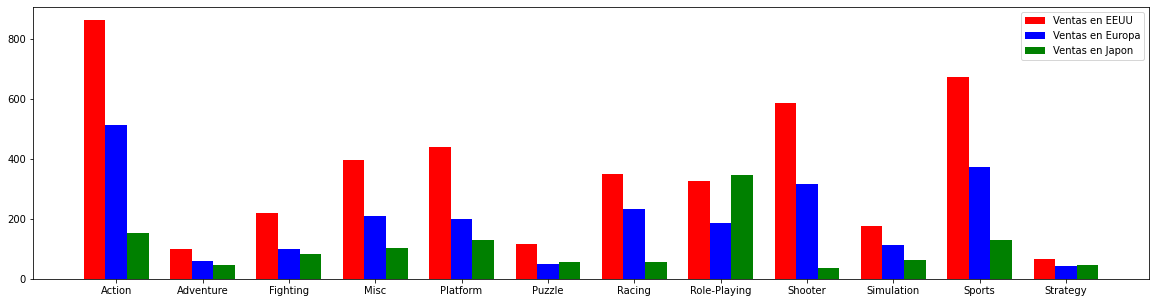

In [ ]:
df_new = df.groupby(['Genre'])['NA_Sales', 'EU_Sales','JP_Sales'].sum()
n = len(df_new.index)
x = np.arange(n)
width = 0.25
fig, ax = plt.subplots(figsize=(20,5))
plt.bar(x - width, df_new.NA_Sales, width=width, label='Ventas en EEUU', color = 'red')
plt.bar(x, df_new.EU_Sales, width=width, label='Ventas en Europa', color = 'blue')
plt.bar(x + width, df_new.JP_Sales, width=width, label='Ventas en Japon', color = 'green')
plt.xticks(x, df_new.index)
plt.legend(loc='best')
plt.show()

Segun lo graficado en este caso podemos ver como los juegos mas vendidos a nivel mundial son los juegos de accion (incluyendo los Shooters) y los de deportes. Para penetrar en este mercado seria ideal desarrollar juegos de estos generos.

**2.2 CANTIDAD DE JUEGOS POR GENERO Y PLATAFORMA**

En el siguiente apartado vemos la distribucion de juegos por genero y plataforma a nivel global

Text(0.5, 0, 'Plataforma')

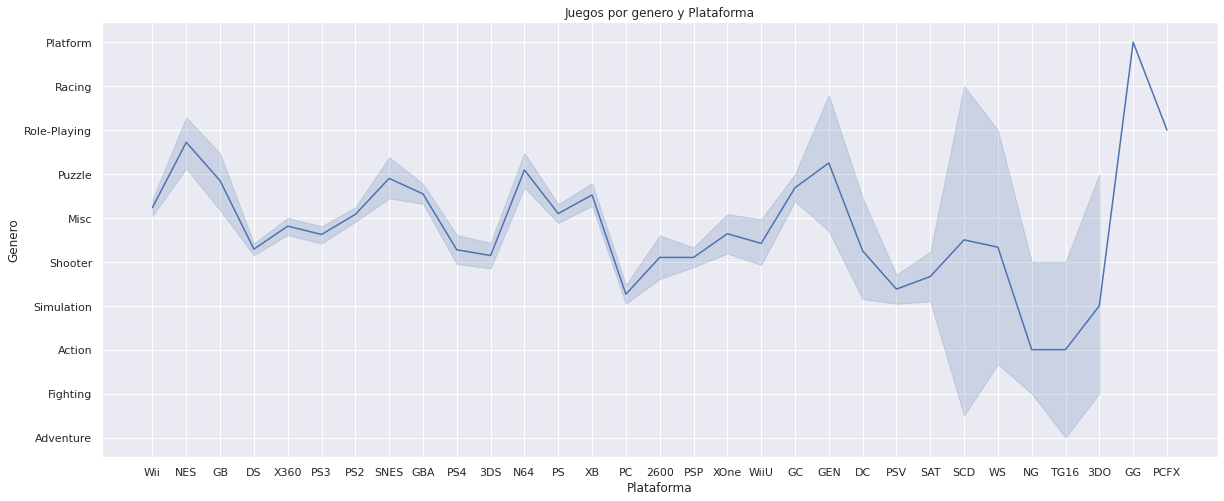

In [ ]:
sns.lineplot(data=df, x='Platform', y="Genre")
sns.set(rc = {'figure.figsize':(30,8)})
plt.title("Juegos por genero y Plataforma")
plt.ylabel("Genero")
plt.xlabel("Plataforma")

Por la grafica podemos observar que la mayoria de las consolas oscilan ente los juegos miscelaneos y los shooters teniendo pocos picos hacia los extremos de la grafica que son consolas antiguas. En este caso podemos afirmar que cada plataforma tiene un genero caracteristico propio. Ni siquiera las diferentes consolas de una misma marca continuan con un solo genero.

**2.3 JUEGOS POR GENERO Y REGION**

En el siguiente Grafico podemos ver la distribucion de juegos por genero y region.

Text(0.5, 0, 'Genero')

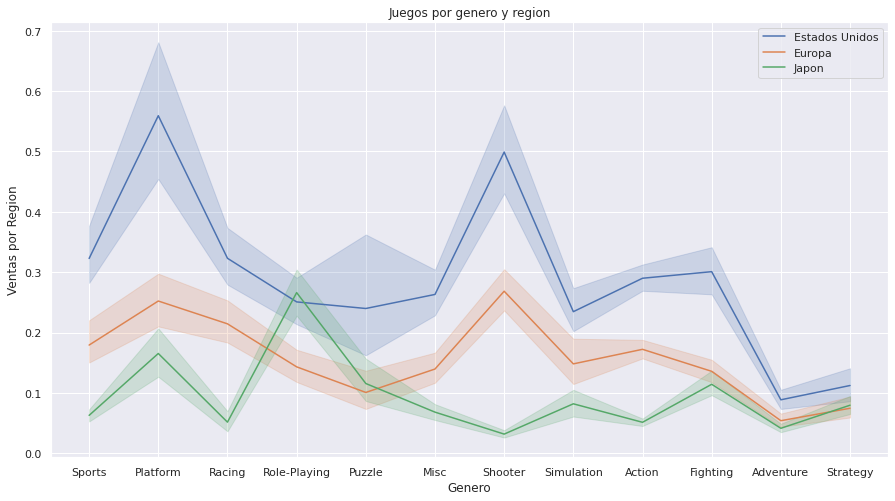

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(data=df, x='Genre', y="NA_Sales")
sns.lineplot(data=df, x='Genre', y="EU_Sales")
sns.lineplot(data=df, x='Genre', y='JP_Sales')
plt.legend(labels=["Estados Unidos","Europa","Japon"])
plt.title("Juegos por genero y region")
plt.ylabel("Ventas por Region")
plt.xlabel("Genero")

Segun esta grafica podemos en primer lugar ver como los RPG son ampliamente vendidos en Japon pero apenas alcanza la misma cantidad de ventas que en Estados Unidos. Esto habla del tamaño superior de ventas de Estados Unidos frente a otros mercados. Por otro lado podemos observar como el mercado europeo es similar en gustos y caracteristicas al mercado de Estados Unidos y a su vez estos son bastante diferentes a los gustos del mercado japones.

**3 PRODUCCION DE JUEGOS ANUAL**

En este punto podemos observar como la produccion de videojuegos ha ido en aumento a lo largo de los años alcanzando su punto maximo en el año 2008, despues de esto se ve un decrecimiento.

[]

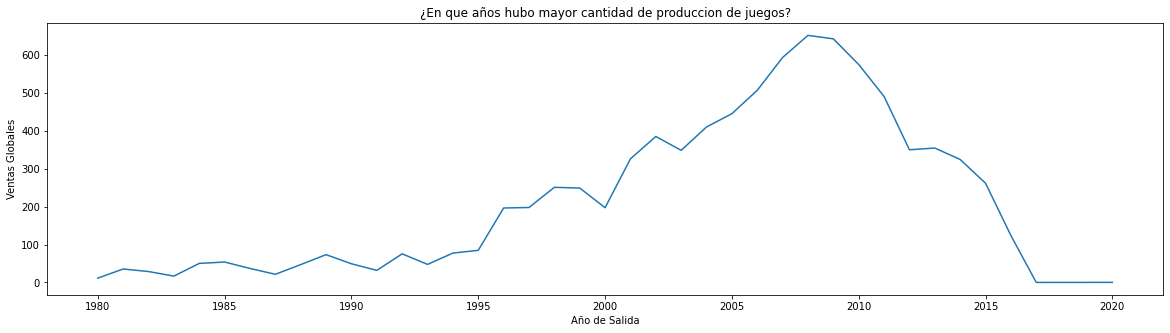

In [ ]:
df_1 = df[['Global_Sales','Year_of_Release']].groupby(by='Year_of_Release').sum('Global_Sales')
df_1
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(df_1.index,df_1.Global_Sales)
ax.set_xlabel('Año de Salida')                  
ax.set_ylabel('Ventas Globales')
ax.set_title('¿En que años hubo mayor cantidad de produccion de juegos?')
plt.plot()

**4 LOS VIDEOJUEGOS POR SU CLASIFICACION**

**4.1 Ventas por clasificacion y region**

En el siguiente grafico analizaremos las ventas de videjuegos por clasificacion y region

Text(0.5, 0, 'Clasificacion')

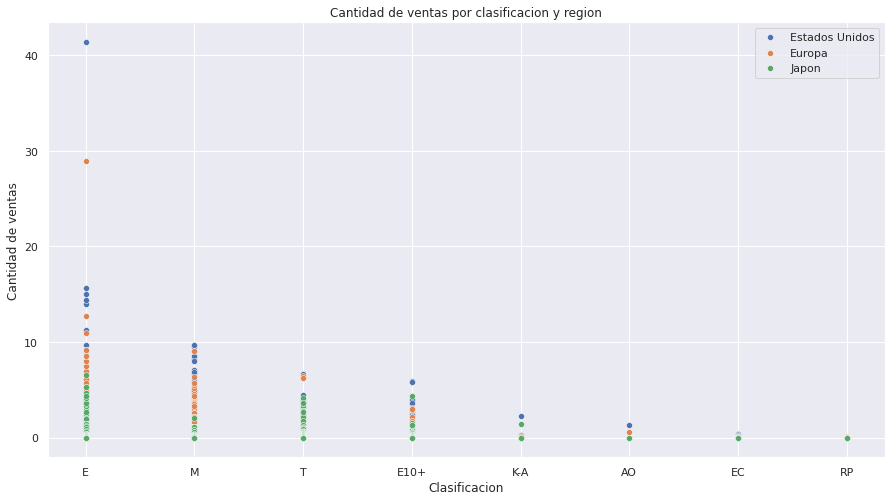

In [ ]:
sns.scatterplot(data=df, x='Rating', y='NA_Sales') 
sns.scatterplot(data=df, x='Rating', y='EU_Sales')
sns.scatterplot(data=df, x='Rating', y='JP_Sales')
plt.legend(labels=["Estados Unidos","Europa","Japon"])
plt.title("Cantidad de ventas por clasificacion y region")
plt.ylabel("Cantidad de ventas")
plt.xlabel("Clasificacion")

Segun esta grafica podemos ver como los juegos con clasificacion E (para todo el mundo) son los mas vendidos en los tres mercados, seguidos por la clasificacion M (Mature +17 años) y T (Teen). Mientras que los menos vendidos son RP (Rating Pending), seguido por EC (Early Childhood) y AO (Adults Only)

Text(0.5, 1.0, '¿Que generos de juegos se vendieron mas en NA?')

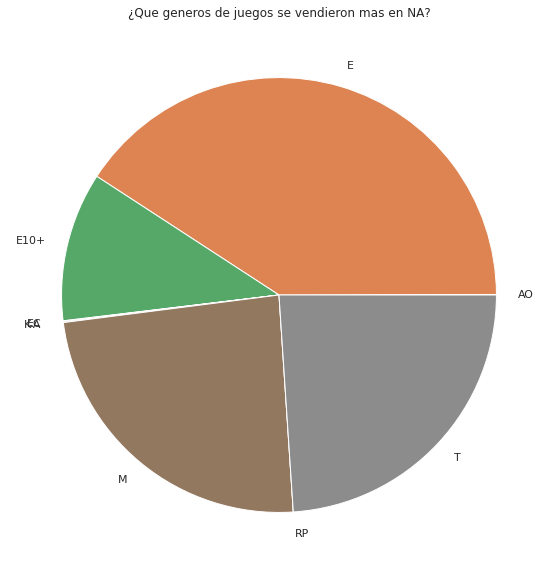

In [ ]:
df_3 = df[['NA_Sales','Rating']].groupby(by='Rating').sum('NA_Sales')
df_3
plt.figure(figsize=(20,10))
plt.pie(df_3.NA_Sales, labels = df_3.index)
plt.title('¿Que clasificacion de juegos se vendieron mas en EEUU?')

Text(0.5, 1.0, '¿Que clasificacion de juegos se vendieron mas en Europa?')

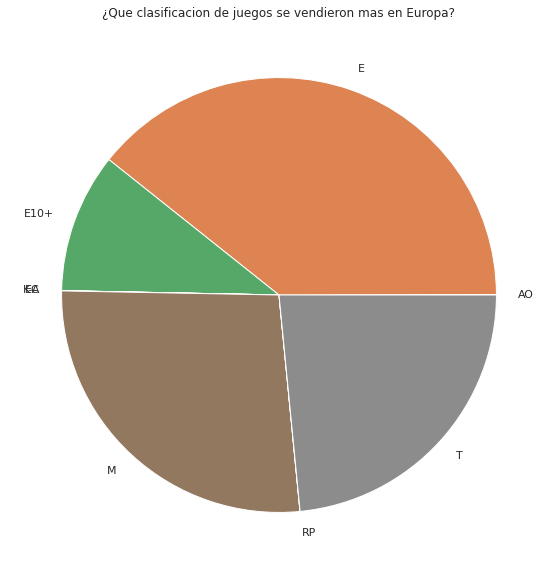

In [ ]:
df_3 = df[['EU_Sales','Rating']].groupby(by='Rating').sum('EU_Sales')
df_3
plt.figure(figsize=(20,10))
plt.pie(df_3.EU_Sales, labels = df_3.index)
plt.title('¿Que clasificacion de juegos se vendieron mas en Europa?')

In [ ]:
df_3 = df[['JP_Sales','Rating']].groupby(by='Rating').sum('JP_Sales')
df_3
plt.figure(figsize=(20,10))
plt.pie(df_3.JP_Sales, labels = df_3.index)
plt.title('¿Que clasificacion de juegos se vendieron mas en Europa?')

En lineas generales vemos pocas diferencias entre la eleccion de los diferentes mercados por la clasificacion de los juegos. Podemos observar que en los tres predominan los juegos con clasificacion E (Para todo publico). La unica diferencia clara es que en el mercado japones los juegos de clasificacion M (Mature +17) son sobrepasados por los de clasificacion T (Teen).